<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_02/02_09_04_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.9.4. Ejemplo Círculo de mohr

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 15, 2022 | Conversión de código de MAXIMA a Python|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 15, 2022 | Mejor presentación de resultados y otros cálculos|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 19, 2022 | Cambiando comando ```.eig``` por ```.eigh``` |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 17, 2023 | Simplificando el gráfico |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 19, 2023 | Añadiendo gráfica de las funciones |



In [96]:
import numpy as np              # Librería para cálculo algebráico.
import matplotlib.pyplot as plt # Librería para hacer gráficas.

# Para imprimir algo bonito
import sympy as sp
from IPython.display import Math                 
def imprimir (texto, variable, unidad=False):
    if unidad:
        return Math(texto + rf'{sp.latex(variable)}' + unidad)
    else:
        return Math(texto + rf'{sp.latex(variable)}') 

El estado de esfuerzos es el siguiente:

In [97]:
# Se definen los esfuerzos
sx  = -1 # Pa
sy  =  2 # Pa
txy = -3 # Pa

# Se construye la matriz de tensiones (esfuerzos).
sigma = np.array([[ sx, txy], 
                  [txy, sy]])

imprimir(r"\underline{\underline{\boldsymbol{\sigma}}} =", sp.Matrix(sigma))

<IPython.core.display.Math object>

In [98]:
# Veamos cómo se imprime la matriz sigma sin formato
sigma

array([[-1, -3],
       [-3,  2]])

En códigos pasados calculamos el polinomio característico con la función ```sympy.charpoly()```, la cual nos arroja un resultado simbólico; al ser este un cálculo algebráico, usamos la función ```numpy.poly()``` la cual devuelve los coeficientes de dicho polinomio.

Para más detalles revisar la [documentación](https://numpy.org/doc/stable/reference/generated/numpy.poly.html).

A diferencia de MAXIMA, este arreglo inicia con el coeficiente del termino con el máximo exponente.

In [99]:
# Obtengo los coeficientes del polinomio característico:
polinomcar = np.poly(sigma)
polinomcar

array([  1.,  -1., -11.])

Es decir, que el polinomio característico es 

$$
p(\sigma_n) = \sigma_n^2 - \sigma_n - 11 
$$

Recuerde que un polinomio se puede expresar como el siguiente producto punto:

$$
\left \langle (\sigma_n^2, \sigma_n, 1), (1, -1, -11) \right \rangle 
$$

Ahora, se calculan las raices del polinomio característico, las cuales son la magnitud de los esfuerzos principales.

In [100]:
s1_xy, s2_xy = np.roots(polinomcar)

In [101]:
imprimir(r"(\sigma_1)_{xy} =", s1_xy.round(3), " Pa")

<IPython.core.display.Math object>

In [102]:
imprimir(r"(\sigma_2)_{xy} =", s2_xy.round(3), " Pa")

<IPython.core.display.Math object>

Los esfuerzos principales también se pueden calcular resolviendo el sistema de valores y vectores propios. Sabiendo que, para la matriz $\underline{\underline{\boldsymbol{\sigma}}}$, sus valores propios son las magnitudes de los esfuerzos principales y sus vectores propios son las direcciones principales, procedemos a resolver el problema $\underline{\underline{\boldsymbol{\sigma}}} \boldsymbol{\hat{n}} = \sigma_n \boldsymbol{\hat{n}}$ con el comando ```np.linalg.eigh()``` el cual retorna una lista de dos entradas, la primera contiene los valores propios y la segunda contiene los vectores porpios.

*Nota: refiérase a la documentación para entender porqué se usa el comando [np.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) en lugar del [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)*. 

In [103]:
valp, vecp   = np.linalg.eigh(sigma)

# Extraigo los resultados (ordenados de menor a mayor)
s2_xy, s1_xy = valp
n2g,   n1g   = vecp[:,0], vecp[:,1]     # Las columnas, no las filas.
            #= vecp.T[0], vecp.T[1]       es una forma alterna.

In [104]:
imprimir(r"(\sigma_1)_{xy} =", s1_xy.round(3), " Pa")

<IPython.core.display.Math object>

In [105]:
imprimir(r"(\sigma_2)_{xy} =", s2_xy.round(3), " Pa")

<IPython.core.display.Math object>

In [106]:
imprimir(r"\boldsymbol{\hat{n}}^T_1 =", n1g)

<IPython.core.display.Math object>

In [107]:
imprimir(r"\boldsymbol{\hat{n}}^T_2 =", n2g)

<IPython.core.display.Math object>

In [108]:
# Y si miramos el contenido del arreglo "vecp"
vecp

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

Se calcula el ángulo asociado al esfuerzo principal $(\sigma_1)_{xy}$ con la ecuación:

$$
\text{tan }2\theta_1 = \frac{2\tau_{xy}}{\sigma_x - \sigma_y}
$$


In [109]:
t1 = np.arctan2(2*txy, sx - sy)/2
imprimir(r"\theta_1 =", t1.round(4), " rad")

<IPython.core.display.Math object>

In [110]:
# Expresamos el ángulo en grados
imprimir(r"\theta_1 =", np.rad2deg(t1).round(2), " °")

<IPython.core.display.Math object>

A partir del ángulo $\theta_1$ y con las relaciones aprendidas, es posible indicar las direcciones principales como:

In [111]:
n1g = np.array([np.cos(t1), np.sin(t1)])
n2g = np.array([np.cos(t1 + np.pi/2), np.sin(t1 + np.pi/2)])

In [112]:
imprimir(r"\boldsymbol{\hat{n}}^T_1 =", n1g)

<IPython.core.display.Math object>

In [113]:
imprimir(r"\boldsymbol{\hat{n}}^T_2 =", n2g)

<IPython.core.display.Math object>

Finalmente, el esfuerzo cortante máximo $\tau_{max}$ a partir de la ecuación (2.65):

$$
\tau_{max} = +\frac{(\sigma_1)_{xy} - (\sigma_2)_{xy}}{2} = +\sqrt{\left(\frac{\sigma_x - \sigma_y}{2}\right)^2 + \tau_{xy}^2 }  
$$

In [114]:
tau_max = np.sqrt(((sx - sy)/2)**2 + txy**2)
imprimir(r"\tau_{max} =", tau_max.round(3), " Pa")

<IPython.core.display.Math object>

Y recuerde que actúa sobre los planos ubicados a 45° de $\theta_1$, es decir, sobre los planos que tienen los siguientes vectores unitarios:

In [115]:
[ np.cos(t1 + np.pi/4), np.sin(t1 + np.pi/4) ]

[0.9732489894677302, -0.2297529205473612]

In [116]:
[ np.cos(t1 - np.pi/4), np.sin(t1 - np.pi/4) ]

[-0.22975292054736113, -0.9732489894677302]

Recuerde que lo relevante en el cálculo de vectores propios es su dirección, no su sentido (+ o -).

## Gráfico del círculo de Mohr

Utilizando las funcinaliades de graficación de Python es posible dibujar el círculo de Mohr para este estado de esfuerzos. Para ellos, empleamos las funciones parametrizadas.

El círculo de mohr tiene dominio [0, 180°), esto lo calculo pero en radianes:

In [117]:
# Discretizo el dominio en 100 puntos.
tt = np.linspace(0, np.pi, 100)   

Realizo el cálculo de las ecuaciones (2.31) y (2.32). Como el dominio lo definí en un arreglo de numpy, simplemente evalúo las ecuaciones en el arreglo completo. 

In [118]:
ssn_t = ( sx+sy )/2 + ( sx-sy )/2*np.cos( 2*tt ) + txy*np.sin( 2*tt )
ttn_t = txy*np.cos( 2*tt ) - ( sx-sy )/2*np.sin( 2*tt ) 

Realizo el gráfico

In [119]:
# Defino un tamaño de fuente para todos los gráficos de este cuaderno
plt.rcParams.update({'font.size': 10})

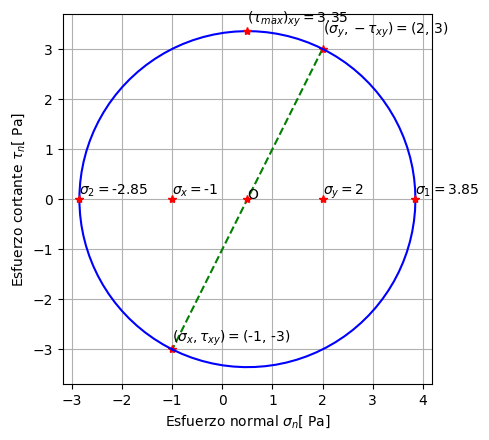

In [126]:
# Inicio el lienzo.
fig, ax = plt.subplots()

# Dibujo la recta que pasa por los puntos C y A.
ax.plot((sy, sx), (-txy, txy), "--g")

ax.plot(sy, -txy, "*r")  
ax.plot(sx, txy,  "*r")  

ax.text(sy, -txy*1.1, r"$( \sigma_y, -\tau_{xy} )=$" + f"({sy}, {-txy})")  
ax.text(sx, txy*0.95,  r"$( \sigma_x, \tau_{xy} )=$" + f"({sx}, {txy})")  

# Marco el centro de la circunferencia O.
ax.plot((sx+sy)/2, 0, "*r")
ax.text((sx+sy)/2, 0,  "O")

# Dibujo la circunferencia.
ax.plot(ssn_t, ttn_t, "-b")

# Ubico los esfuerzos sx, sy 
ax.plot(sx, 0, "*r")
ax.text(sx, 0.1, r"$\sigma_x = $" + f"{sx}")
ax.plot(sy, 0, "*r")
ax.text(sy, 0.1, r"$\sigma_y = $" + f"{sy}")

# Ubico los esfuerzos principales s1, s2 
ax.plot(s1_xy, 0, "*r")
ax.text(s1_xy, 0.1, r"$\sigma_1 = $" + f"{round(s1_xy, 2)}")
ax.plot(s2_xy, 0, "*r")
ax.text(s2_xy, 0.1, r"$\sigma_2 = $" + f"{round(s2_xy, 2)}")

# Indico el esfuerzo cortante máximo.
ax.plot((sx+sy)/2, tau_max, "*r")
ax.text((sx+sy)/2, 1.05*tau_max, r"$(\tau_{max})_{xy} = $" + f"{round(tau_max, 2)}")

# Nombre de los ejes.
ax.set_xlabel("Esfuerzo normal " + r"$\sigma_n$" + "[ Pa]" )
ax.set_ylabel("Esfuerzo cortante " + r"$\tau_n$" + "[ Pa]")

# Configuro parámetros del lienzo.
ax.grid(which='major', linestyle='-')
ax.set_aspect('equal', adjustable='box')

# Presento en pantalla el lienzo.
plt.show()

En el video [Understanding Stress Transformation and Mohr's Circle](https://www.youtube.com/watch?v=_DH3546mSCM&ab_channel=TheEfficientEngineer) aparece una representación interesante de las funciones que construyen el círculo de Mohr.

**NOTA**: *Tenga en cuenta que en dicho video hay diferencias respecto al punto de inicio de graficación del círculo de Mohr y al sentido de medición de los ángulos.* 

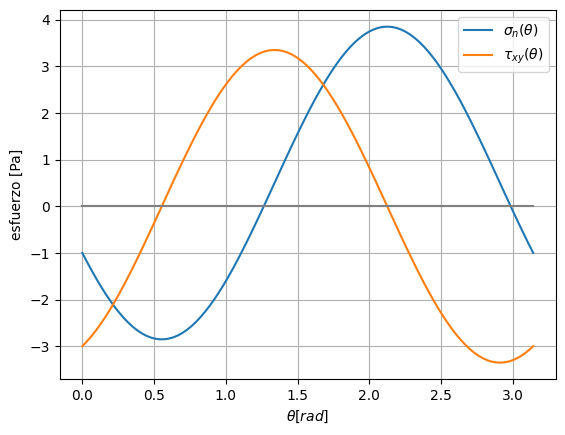

In [127]:
fig, ax = plt.subplots()
ax.plot(tt, ssn_t, label=r"$\sigma_n(\theta) $")
ax.plot(tt, ttn_t, label=r"$\tau_{xy}(\theta)$")
ax.plot(tt, np.zeros(tt.shape[0]), color="grey")
ax.set_xlabel(r"$\theta [rad]$")
ax.set_ylabel("esfuerzo [Pa]")
ax.legend()
ax.grid()
plt.show()